In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
import emcee
import sys
%matplotlib inline

In [2]:
b = phoebe.default_binary(contact_binary = True)

In [3]:
#b.add_constraint('semidetached', 'primary')

In [4]:
#b.add_constraint('semidetached', 'secondary')

In [5]:
b['period@orbit'] = 1
b['sma@orbit'] = 1
#b['q@binary'] = 0.44
# b['incl@orbit'] = 83.5
# b['requiv@primary'] = 1.2
# b['requiv@secondary'] = 0.8
#b['teff@primary'] = 5660.
# b['teff@secondary'] = 5500.

In [6]:
#lc = np.loadtxt('data.lc')
v737 = np.loadtxt('v737per.B')
vdata = v737[:,1]
flux = vdata/(-2.5)
flux10 = 10**flux
lc = v737
lc[:,1] = flux10

In [7]:
b.add_dataset('lc', times=lc[:,0], fluxes=lc[:,1], sigmas=0.05*np.ones(len(lc)), passband='Johnson:B')

<ParameterSet: 78 parameters | contexts: compute, dataset, constraint, figure>

In [8]:
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()
b.set_value_all('irrad_method', 'none')

In [9]:
b.flip_constraint('compute_phases', 'compute_times')
b['compute_phases@lc@dataset'] = np.linspace(-0.5,0.5,len(lc))

In [10]:
def lnprob(x, adjpars, priors):
    #Check to see that all values are within the allowed limits:
    if not np.all([priors[i][0] < x[i] < priors[i][1] for i in range(len(priors))]):
         return -np.inf

    for i in range(len(adjpars)):
        b[adjpars[i]] = x[i]
    
    # Let's assume that our priors are uniform on the range of the physical parameter combinations.
    # This is already handled in Phoebe, which will throw an error if the system is not physical,
    # therefore it's easy to implement the lnprior as =0 when system checks pass and =-inf if they don't.
    # Here we'll 'package' this in a simple try/except statement:
    
    try:
        b.run_compute(irrad_method='none')

        # sum of squares of the residuals
        fluxes_model = b['fluxes@model'].interp_value(times=lc[:,0])
        #lnp = -0.5*np.sum((fluxes_model-b['value@fluxes@dataset'])**2 / b['value@sigmas@dataset']**2)
        mag_model = -2.5*np.log10(fluxes_model) 
        mag_model = mag_model-np.mean(mag_model)
        mag_value = -2.5*np.log10(b['value@fluxes@dataset'])
        mag_value = mag_value-np.mean(mag_value)
        lnp = -0.5*np.sum((mag_model-mag_value)**2 / b['value@sigmas@dataset']**2)
        
        #print('inp is ok!')

    except:
        lnp = -np.inf

    sys.stderr.write("lnp = %e\n" % (lnp))

    return lnp

In [11]:
from scipy.stats import norm
def run(adjpars, priors, nwalkers, niter):
    ndim = len(adjpars)

   

    p0 = np.array([[p[0] + (p[1]-p[0])*np.random.rand() for p in priors] for i in range(nwalkers)])

#     pool = MPIPool()
#     if not pool.is_master():
#         pool.wait()
#         sys.exit(0)

    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[adjpars, priors])

    pos, prob, state = sampler.run_mcmc(p0, niter)
    
    print(p0)
    
    for i in range(ndim):
        plt.figure()
        y = sampler.flatchain[:,i]
        n, bins, patches = plt.hist(y, 200, density=1, color="b", alpha=0.45)
        plt.title("Dimension {0:d}".format(i))
        
        mu = np.average(y)
        sigma = np.std(y)       
        print ("mu,", "sigma = ", mu, sigma)

        bf = norm.pdf(bins, mu, sigma)
        l = plt.plot(bins, bf, 'k--', linewidth=2.0)

    #plt.show()
    
    return pos

#     pool.close()



lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.77it/s]
lnp = -1.623158e+02
100%|██████████| 310/310 [00:10<00:00, 30.21it/s]
lnp = -7.519842e+01
100%|██████████| 310/310 [00:10<00:00, 30.68it/s]
lnp = -1.794466e+02
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.48it/s]
lnp = -2.006496e+02
100%|██████████| 310/310 [00:09<00:00, 31.10it/s]
lnp = -2.330600e+02
100%|██████████| 310/310 [00:10<00:00, 30.90it/s]
lnp = -1.402767e+02
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.78it/s]
lnp = -1.040917e+02
100%|██████████| 310/310 [00:10<00:00, 30.99it/s]
lnp = -1.895685e+02
100%|██████████| 310/310 [00:10<00:00, 30.89it/s]
lnp = -4.289768e+02
100%|██████████| 310/310 [00:09<00:00, 31.70it/s]
lnp = -1.026190e+03
lnp = -inf
100%|██████████| 310/310 [00:09<00:00, 31.61it/s]
lnp = -3.528347e+02
100%|██████████| 310/310 [00:10<00:00, 30.07it/s]
lnp = -7.326125e+01
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.47it/s]
lnp = -2.120774e+02
ln

100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -8.072862e+01
100%|██████████| 310/310 [00:10<00:00, 30.96it/s]
lnp = -1.421500e+02
100%|██████████| 310/310 [00:10<00:00, 30.72it/s]
lnp = -2.636028e+02
100%|██████████| 310/310 [00:09<00:00, 31.01it/s]
lnp = -2.660178e+02
100%|██████████| 310/310 [00:10<00:00, 30.78it/s]
lnp = -1.429942e+02
100%|██████████| 310/310 [00:10<00:00, 29.58it/s]
lnp = -8.113982e+01
100%|██████████| 310/310 [00:10<00:00, 30.89it/s]
lnp = -4.361535e+02
100%|██████████| 310/310 [00:10<00:00, 30.92it/s]
lnp = -7.022157e+01
lnp = -inf
100%|██████████| 310/310 [00:09<00:00, 31.15it/s]
lnp = -1.864574e+02
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 29.35it/s]
lnp = -6.017805e+01
100%|██████████| 310/310 [00:10<00:00, 30.64it/s]
lnp = -7.771852e+02
100%|██████████| 310/310 [00:10<00:00, 30.86it/s]
lnp = -1.544479e+02
100%|██████████| 310/310 [00:09<00:00, 31.00it/s]
lnp = -1.546961e+02
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -1.151788e+0

100%|██████████| 310/310 [00:09<00:00, 31.04it/s]
lnp = -1.163809e+02
100%|██████████| 310/310 [00:10<00:00, 30.64it/s]
lnp = -7.886770e+01
100%|██████████| 310/310 [00:10<00:00, 30.52it/s]
lnp = -8.424484e+01
100%|██████████| 310/310 [00:09<00:00, 31.02it/s]
lnp = -2.856809e+02
100%|██████████| 310/310 [00:09<00:00, 31.21it/s]
lnp = -9.224822e+01
100%|██████████| 310/310 [00:10<00:00, 30.29it/s]
lnp = -6.413213e+01
100%|██████████| 310/310 [00:10<00:00, 30.52it/s]
lnp = -1.953022e+02
100%|██████████| 310/310 [00:10<00:00, 30.39it/s]
lnp = -5.352867e+01
100%|██████████| 310/310 [00:10<00:00, 30.44it/s]
lnp = -9.112015e+01
100%|██████████| 310/310 [00:10<00:00, 30.19it/s]
lnp = -7.195691e+01
100%|██████████| 310/310 [00:10<00:00, 29.70it/s]
lnp = -5.881474e+01
100%|██████████| 310/310 [00:10<00:00, 30.55it/s]
lnp = -9.568928e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -9.191392e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.634421e+01
100%|██████████| 310

100%|██████████| 310/310 [00:09<00:00, 31.57it/s]
lnp = -8.370559e+01
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -8.416749e+01
100%|██████████| 310/310 [00:10<00:00, 30.05it/s]
lnp = -8.852488e+01
100%|██████████| 310/310 [00:10<00:00, 29.54it/s]
lnp = -5.851545e+01
100%|██████████| 310/310 [00:10<00:00, 30.60it/s]
lnp = -1.267301e+02
100%|██████████| 310/310 [00:10<00:00, 30.16it/s]
lnp = -5.324120e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -6.816034e+01
100%|██████████| 310/310 [00:10<00:00, 30.99it/s]
lnp = -6.735211e+01
100%|██████████| 310/310 [00:10<00:00, 30.46it/s]
lnp = -5.570854e+01
100%|██████████| 310/310 [00:09<00:00, 31.29it/s]
lnp = -1.016675e+02
100%|██████████| 310/310 [00:09<00:00, 31.41it/s]
lnp = -1.319646e+02
100%|██████████| 310/310 [00:10<00:00, 30.66it/s]
lnp = -5.915247e+01
100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -7.857958e+01
100%|██████████| 310/310 [00:10<00:00, 30.90it/s]
lnp = -8.830514e+01
100%|██████████| 310

100%|██████████| 310/310 [00:10<00:00, 30.93it/s]
lnp = -5.801327e+01
100%|██████████| 310/310 [00:09<00:00, 31.19it/s]
lnp = -1.096607e+02
100%|██████████| 310/310 [00:10<00:00, 30.32it/s]
lnp = -5.907299e+01
100%|██████████| 310/310 [00:10<00:00, 30.82it/s]
lnp = -7.125360e+01
100%|██████████| 310/310 [00:09<00:00, 31.47it/s]
lnp = -5.530995e+01
100%|██████████| 310/310 [00:10<00:00, 30.30it/s]
lnp = -6.642011e+01
100%|██████████| 310/310 [00:10<00:00, 30.17it/s]
lnp = -5.780204e+01
100%|██████████| 310/310 [00:10<00:00, 30.17it/s]
lnp = -6.381262e+01
100%|██████████| 310/310 [00:10<00:00, 29.71it/s]
lnp = -8.102664e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.87it/s]
lnp = -6.987709e+01
100%|██████████| 310/310 [00:09<00:00, 31.12it/s]
lnp = -4.694133e+01
100%|██████████| 310/310 [00:10<00:00, 30.21it/s]
lnp = -5.496399e+01
100%|██████████| 310/310 [00:10<00:00, 29.61it/s]
lnp = -4.402120e+01
100%|██████████| 310/310 [00:10<00:00, 30.35it/s]
lnp = -6.016078e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 30.36it/s]
lnp = -4.475001e+01
100%|██████████| 310/310 [00:10<00:00, 30.11it/s]
lnp = -5.019510e+01
100%|██████████| 310/310 [00:09<00:00, 31.12it/s]
lnp = -6.779748e+01
100%|██████████| 310/310 [00:10<00:00, 30.47it/s]
lnp = -5.089666e+01
100%|██████████| 310/310 [00:10<00:00, 30.35it/s]
lnp = -4.375982e+01
100%|██████████| 310/310 [00:10<00:00, 30.58it/s]
lnp = -5.798460e+01
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -6.136344e+01
100%|██████████| 310/310 [00:10<00:00, 30.75it/s]
lnp = -7.162040e+01
100%|██████████| 310/310 [00:10<00:00, 30.26it/s]
lnp = -6.476583e+01
100%|██████████| 310/310 [00:10<00:00, 30.07it/s]
lnp = -5.628866e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -4.390451e+01
100%|██████████| 310/310 [00:10<00:00, 30.30it/s]
lnp = -7.790221e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.842726e+01
100%|██████████| 310/310 [00:10<00:00, 30.51it/s]
lnp = -6.140780e+01
100%|██████████| 310

100%|██████████| 310/310 [00:10<00:00, 30.04it/s]
lnp = -6.630685e+01
100%|██████████| 310/310 [00:10<00:00, 30.44it/s]
lnp = -4.805182e+01
100%|██████████| 310/310 [00:10<00:00, 30.39it/s]
lnp = -5.273119e+01
100%|██████████| 310/310 [00:09<00:00, 31.04it/s]
lnp = -6.837360e+01
100%|██████████| 310/310 [00:10<00:00, 30.36it/s]
lnp = -4.808835e+01
100%|██████████| 310/310 [00:10<00:00, 30.59it/s]
lnp = -6.963674e+01
100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -4.999871e+01
100%|██████████| 310/310 [00:10<00:00, 30.38it/s]
lnp = -4.564116e+01
100%|██████████| 310/310 [00:09<00:00, 31.14it/s]
lnp = -6.088074e+01
100%|██████████| 310/310 [00:10<00:00, 29.94it/s]
lnp = -5.316331e+01
100%|██████████| 310/310 [00:10<00:00, 30.23it/s]
lnp = -5.813475e+01
100%|██████████| 310/310 [00:10<00:00, 30.61it/s]
lnp = -4.391401e+01
100%|██████████| 310/310 [00:10<00:00, 30.31it/s]
lnp = -4.399178e+01
100%|██████████| 310/310 [00:10<00:00, 30.57it/s]
lnp = -4.883147e+01
100%|██████████| 310

100%|██████████| 310/310 [00:10<00:00, 30.68it/s]
lnp = -4.595307e+01
100%|██████████| 310/310 [00:10<00:00, 30.46it/s]
lnp = -4.370726e+01
100%|██████████| 310/310 [00:10<00:00, 30.39it/s]
lnp = -4.469797e+01
100%|██████████| 310/310 [00:10<00:00, 30.30it/s]
lnp = -4.682804e+01
100%|██████████| 310/310 [00:10<00:00, 30.35it/s]
lnp = -4.987179e+01
100%|██████████| 310/310 [00:10<00:00, 30.75it/s]
lnp = -4.860437e+01
100%|██████████| 310/310 [00:10<00:00, 30.25it/s]
lnp = -4.410131e+01
100%|██████████| 310/310 [00:10<00:00, 30.65it/s]
lnp = -7.025296e+01
100%|██████████| 310/310 [00:10<00:00, 30.47it/s]
lnp = -4.642695e+01
100%|██████████| 310/310 [00:10<00:00, 30.50it/s]
lnp = -4.751903e+01
100%|██████████| 310/310 [00:10<00:00, 30.42it/s]
lnp = -6.373556e+01
100%|██████████| 310/310 [00:10<00:00, 30.94it/s]
lnp = -5.456665e+01
100%|██████████| 310/310 [00:10<00:00, 30.12it/s]
lnp = -4.420087e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.378500e+01
100%|██████████| 310

100%|██████████| 310/310 [00:10<00:00, 30.14it/s]
lnp = -4.792631e+01
100%|██████████| 310/310 [00:10<00:00, 30.29it/s]
lnp = -4.444744e+01
100%|██████████| 310/310 [00:10<00:00, 30.24it/s]
lnp = -4.406647e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.88it/s]
lnp = -4.697033e+01
100%|██████████| 310/310 [00:10<00:00, 30.40it/s]
lnp = -4.589248e+01
100%|██████████| 310/310 [00:10<00:00, 30.22it/s]
lnp = -5.962713e+01
100%|██████████| 310/310 [00:10<00:00, 30.37it/s]
lnp = -4.644534e+01
100%|██████████| 310/310 [00:10<00:00, 29.86it/s]
lnp = -4.403765e+01
100%|██████████| 310/310 [00:10<00:00, 30.70it/s]
lnp = -4.725905e+01
100%|██████████| 310/310 [00:10<00:00, 30.64it/s]
lnp = -5.653051e+01
100%|██████████| 310/310 [00:10<00:00, 30.03it/s]
lnp = -4.357834e+01
100%|██████████| 310/310 [00:10<00:00, 30.07it/s]
lnp = -5.267496e+01
100%|██████████| 310/310 [00:10<00:00, 30.45it/s]
lnp = -4.872265e+01
100%|██████████| 310/310 [00:09<00:00, 31.14it/s]
lnp = -4.389872e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 30.39it/s]
lnp = -4.404902e+01
100%|██████████| 310/310 [00:10<00:00, 29.94it/s]
lnp = -4.453268e+01
100%|██████████| 310/310 [00:10<00:00, 30.80it/s]
lnp = -4.296795e+01
100%|██████████| 310/310 [00:10<00:00, 30.42it/s]
lnp = -4.300496e+01
100%|██████████| 310/310 [00:10<00:00, 30.84it/s]
lnp = -4.489467e+01
100%|██████████| 310/310 [00:10<00:00, 29.89it/s]
lnp = -4.532489e+01
100%|██████████| 310/310 [00:10<00:00, 30.32it/s]
lnp = -4.393409e+01
100%|██████████| 310/310 [00:10<00:00, 30.90it/s]
lnp = -4.236755e+01
100%|██████████| 310/310 [00:10<00:00, 30.69it/s]
lnp = -4.570364e+01
100%|██████████| 310/310 [00:10<00:00, 30.54it/s]
lnp = -4.407597e+01
100%|██████████| 310/310 [00:10<00:00, 30.16it/s]
lnp = -5.447086e+01
100%|██████████| 310/310 [00:10<00:00, 29.79it/s]
lnp = -4.441140e+01
100%|██████████| 310/310 [00:10<00:00, 29.75it/s]
lnp = -4.483264e+01
100%|██████████| 310/310 [00:10<00:00, 30.39it/s]
lnp = -4.646607e+01
100%|██████████| 310

100%|██████████| 310/310 [00:10<00:00, 30.78it/s]
lnp = -4.657278e+01
100%|██████████| 310/310 [00:10<00:00, 30.08it/s]
lnp = -4.840349e+01
100%|██████████| 310/310 [00:10<00:00, 30.92it/s]
lnp = -5.151126e+01
100%|██████████| 310/310 [00:10<00:00, 29.95it/s]
lnp = -4.630117e+01
100%|██████████| 310/310 [00:10<00:00, 30.25it/s]
lnp = -4.416527e+01
100%|██████████| 310/310 [00:10<00:00, 29.99it/s]
lnp = -4.664569e+01
100%|██████████| 310/310 [00:10<00:00, 30.48it/s]
lnp = -4.224973e+01
100%|██████████| 310/310 [00:10<00:00, 30.11it/s]
lnp = -4.693233e+01
100%|██████████| 310/310 [00:10<00:00, 30.28it/s]
lnp = -4.716535e+01
100%|██████████| 310/310 [00:10<00:00, 30.23it/s]
lnp = -4.621072e+01
100%|██████████| 310/310 [00:10<00:00, 30.05it/s]
lnp = -4.393532e+01
100%|██████████| 310/310 [00:10<00:00, 30.17it/s]
lnp = -4.786783e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.37it/s]
lnp = -4.273220e+01
100%|██████████| 310/310 [00:10<00:00, 30.88it/s]
lnp = -4.630360e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 30.12it/s]
lnp = -4.316181e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.37it/s]
lnp = -4.969165e+01
100%|██████████| 310/310 [00:10<00:00, 30.87it/s]
lnp = -4.526098e+01
100%|██████████| 310/310 [00:10<00:00, 30.67it/s]
lnp = -4.699814e+01
100%|██████████| 310/310 [00:10<00:00, 30.75it/s]
lnp = -4.507485e+01
100%|██████████| 310/310 [00:10<00:00, 30.20it/s]
lnp = -4.319481e+01
100%|██████████| 310/310 [00:10<00:00, 30.24it/s]
lnp = -4.241015e+01
100%|██████████| 310/310 [00:10<00:00, 30.05it/s]
lnp = -4.221390e+01
100%|██████████| 310/310 [00:10<00:00, 30.45it/s]
lnp = -4.893543e+01
100%|██████████| 310/310 [00:10<00:00, 30.39it/s]
lnp = -4.345065e+01
100%|██████████| 310/310 [00:10<00:00, 30.40it/s]
lnp = -4.233724e+01
100%|██████████| 310/310 [00:10<00:00, 30.17it/s]
lnp = -4.613033e+01
100%|██████████| 310/310 [00:10<00:00, 29.83it/s]
lnp = -4.282488e+01
100%|██████████| 310/310 [00:10<00:00, 30.19it/s]
lnp = -4.728304e+01
100%|████

100%|██████████| 310/310 [00:10<00:00, 30.33it/s]
lnp = -4.432483e+01
100%|██████████| 310/310 [00:10<00:00, 30.09it/s]
lnp = -4.826635e+01
100%|██████████| 310/310 [00:10<00:00, 30.70it/s]
lnp = -4.674389e+01
lnp = -inf
lnp = -inf
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.02it/s]
lnp = -4.583743e+01
100%|██████████| 310/310 [00:10<00:00, 30.66it/s]
lnp = -4.488665e+01
100%|██████████| 310/310 [00:09<00:00, 31.17it/s]
lnp = -4.353490e+01
100%|██████████| 310/310 [00:10<00:00, 30.62it/s]
lnp = -4.462519e+01
100%|██████████| 310/310 [00:10<00:00, 30.17it/s]
lnp = -4.738304e+01
100%|██████████| 310/310 [00:10<00:00, 30.05it/s]
lnp = -4.310002e+01
100%|██████████| 310/310 [00:10<00:00, 30.27it/s]
lnp = -4.343717e+01
100%|██████████| 310/310 [00:10<00:00, 29.70it/s]
lnp = -4.301890e+01
100%|██████████| 310/310 [00:10<00:00, 30.55it/s]
lnp = -4.652315e+01
lnp = -inf
100%|██████████| 310/310 [00:10<00:00, 30.00it/s]
lnp = -4.608263e+01
100%|██████████| 310/310 [00:10<00:00, 30.16it

[[5.42550644e-01 7.80310982e+01 4.58206757e-01 5.67902763e+03
  5.62920355e+03]
 [5.22349217e-01 7.87823974e+01 3.14438108e-01 5.59595763e+03
  5.50198206e+03]
 [4.75470030e-01 7.85790510e+01 3.87397811e-01 5.53663739e+03
  5.75170392e+03]
 [5.00643874e-01 7.76010284e+01 4.16516828e-01 5.68686322e+03
  5.61974100e+03]
 [5.46326809e-01 7.94834052e+01 3.42919108e-01 5.75754101e+03
  5.64965975e+03]
 [5.43700844e-01 7.85017217e+01 4.67371481e-01 5.56700063e+03
  5.55327240e+03]
 [4.81321879e-01 7.55840469e+01 4.70692920e-01 5.44209964e+03
  5.79346007e+03]
 [5.10204992e-01 7.79853415e+01 3.89362256e-01 5.51636978e+03
  5.70018899e+03]
 [4.79589444e-01 7.51349349e+01 3.70887918e-01 5.78316935e+03
  5.54741484e+03]
 [5.34758428e-01 7.63511170e+01 3.93659727e-01 5.52977747e+03
  5.55066697e+03]
 [5.38591828e-01 7.93821594e+01 4.46998477e-01 5.62290833e+03
  5.52997198e+03]
 [4.52843461e-01 7.82776057e+01 4.80729103e-01 5.70853036e+03
  5.48928676e+03]
 [5.03650248e-01 7.96009103e+01 3.344066

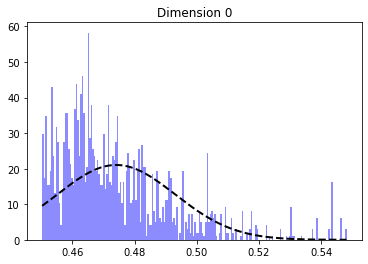

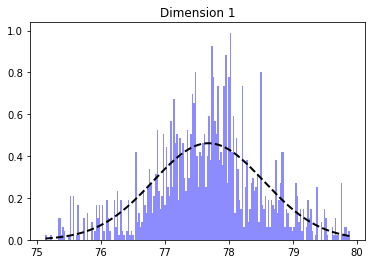

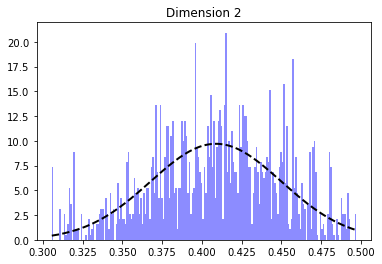

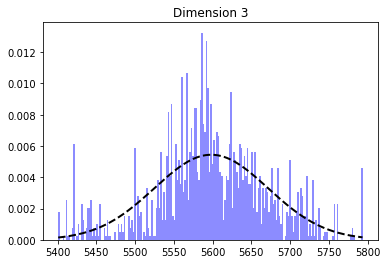

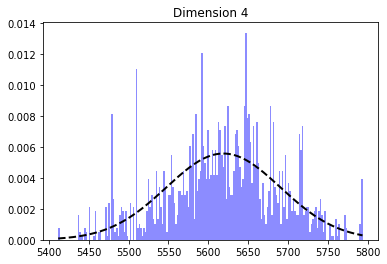

In [12]:
adjpars = ['requiv@primary', 'incl@orbit', 'q@binary', 'teff@primary', 'teff@secondary']
priors = [(0.45,0.55), (75.0, 80.0), (0.3, 0.5), (5400, 5800), (5400., 5800.)]
nwalkers = 20
niters = 100
state = None

import time

time1 = time.time()
postion = run(adjpars, priors, nwalkers, niters)
time2 = time.time()

100%|██████████| 310/310 [00:10<00:00, 30.93it/s]


Text(0, 0.5, 'Flux')

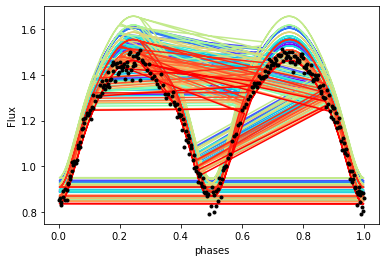

In [13]:
from matplotlib.pyplot import cm 

mod = b
position = postion
times = lc[:,0]
color=cm.rainbow(np.linspace(0,1,nwalkers))

for i,c in zip(range(nwalkers),color):
    
    mod['requiv@primary'] = position[-1-i,0]
    mod['incl@binary@orbit@component'] = position[-1-i,1]
    mod['q@binary'] = position[-1-i,2]
    mod['teff@primary'] = position[-1-i,3]
    mod['teff@secondary'] = position[-1-i,4]
    try:
        mod.run_compute(model='run{}'.format(i))
    except:
        print('it is error')


for i,c in zip(range(nwalkers),color):
    try:
        model = mod['fluxes@run{}'.format(i)].interp_value(times=times)

    #plt.figure(1)
        plt.plot(times,model,c=c)
    except:
        print('it is error')
    
plt.plot(times,lc[:,1],"k.")
plt.xlabel("phases")
plt.ylabel("Flux")


In [14]:
mod['incl@binary@orbit@component']

<Parameter: incl=79.85282858763037 deg | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In [15]:
mod['q@binary']

<Parameter: q=0.347368095030412 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In [16]:
mod['teff@primary']

<Parameter: teff=5550.774118191825 K | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In [17]:
mod['teff@secondary']

<Parameter: teff=5606.845118230427 K | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>

it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error
it is error


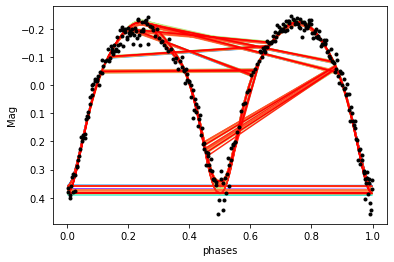

In [18]:
from matplotlib.pyplot import cm 

mod = b
position = postion
times = lc[:,0]
color=cm.rainbow(np.linspace(0,1,nwalkers))

for i,c in zip(range(nwalkers),color):
    
    mod['requiv@primary'] = position[-1-i,0]
    mod['incl@binary@orbit@component'] = position[-1-i,1]
    mod['q@binary'] = position[-1-i,2]
    mod['teff@primary'] = position[-1-i,3]
    mod['teff@secondary'] = position[-1-i,4]
    try:
        mod.run_compute(model='run{}'.format(i))
    except:
        print('it is error')


for i,c in zip(range(nwalkers),color):
    try:
        model = mod['fluxes@run{}'.format(i)].interp_value(times=times)

    #plt.figure(1)
        rmodel = -2.5*np.log10(model)
        resultmodel = rmodel-np.mean(rmodel)
        plt.plot(times,resultmodel,c=c)
    except:
        print('it is error')

lmodel = -2.5*np.log10(lc[:,1])  
lmag = lmodel-np.mean(lmodel)
ax = plt.gca()
plt.plot(times,lmag,"k.")
plt.xlabel("phases")
plt.ylabel("Mag")
ax.yaxis.set_ticks_position('left')
ax.invert_yaxis()